In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
df =  pd.read_csv('Human Resources.csv')
df.head()

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state
0,00-0037846,Kimmy,Walczynski,6/4/1991,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,1/20/2002,NaN,Cleveland,Ohio
1,00-0041533,Ignatius,Springett,6/29/1984,Male,White,Business Development,Business Analyst,Headquarters,4/8/2019,NaN,Cleveland,Ohio
2,00-0045747,Corbie,Bittlestone,7/29/1989,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,10/12/2010,NaN,Cleveland,Ohio
3,00-0055274,Baxy,Matton,9/14/1982,Female,White,Services,Service Tech,Headquarters,4/10/2005,NaN,Cleveland,Ohio
4,00-0076100,Terrell,Suff,4/11/1994,Female,Two or More Races,Product Management,Business Analyst,Remote,9/29/2010,2029-10-29 06:09:38 UTC,Flint,Michigan


In [55]:
df.shape

(37408, 13)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37408 entries, 0 to 37407
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              22214 non-null  object
 1   first_name      22214 non-null  object
 2   last_name       22214 non-null  object
 3   birthdate       22214 non-null  object
 4   gender          22214 non-null  object
 5   race            22214 non-null  object
 6   department      22214 non-null  object
 7   jobtitle        22267 non-null  object
 8   location        22214 non-null  object
 9   hire_date       22214 non-null  object
 10  termdate        3929 non-null   object
 11  location_city   22214 non-null  object
 12  location_state  22214 non-null  object
dtypes: object(13)
memory usage: 3.7+ MB


In [57]:
categorical_vars = df.select_dtypes(include=['object', 'category'])
numerical_vars = df.select_dtypes(include=['int', 'float'])

In [58]:
print("Categorical Variables:")
print(categorical_vars.columns)

print("\nNumerical Variables:")
print(numerical_vars.columns)

Categorical Variables:
Index(['id', 'first_name', 'last_name', 'birthdate', 'gender', 'race',
       'department', 'jobtitle', 'location', 'hire_date', 'termdate',
       'location_city', 'location_state'],
      dtype='object')

Numerical Variables:
Index([], dtype='object')


In [59]:
continuous_vars = []
discrete_vars = []

for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        if len(df[column].unique()) > 20:
            continuous_vars.append(column)
        else:
            discrete_vars.append(column)

# Print the identified variables
print("Continuous Variables:")
print(continuous_vars)

print("\nDiscrete Variables:")
print(discrete_vars)

Continuous Variables:
[]

Discrete Variables:
[]


In [60]:
df.isnull().isnull().sum()

id                0
first_name        0
last_name         0
birthdate         0
gender            0
race              0
department        0
jobtitle          0
location          0
hire_date         0
termdate          0
location_city     0
location_state    0
dtype: int64

In [61]:
df.columns

Index(['id', 'first_name', 'last_name', 'birthdate', 'gender', 'race',
       'department', 'jobtitle', 'location', 'hire_date', 'termdate',
       'location_city', 'location_state'],
      dtype='object')

In [62]:
gen = df['gender'].value_counts()
gen

gender
Male              11288
Female            10321
Non-Conforming      605
Name: count, dtype: int64

# How many are female and white?

In [63]:
female_white = len(df[(df['gender'] == 'female') & (df['race'] == 'white')])

# Display the count of female and white employees
print(f"Number of employees who are female and white: {female_white}")

Number of employees who are female and white: 0


# Look at the age, what percentage are above 50 years, and how many are Gen Z?

In [20]:
age = df['birthdate'].value_counts()
age

birthdate
5/9/1972      9
5/10/1972     8
2/24/1975     8
1/20/1968     8
6/6/1987      8
             ..
1/6/1980      1
1/16/1966     1
10/13/2001    1
11/29/1972    1
2/9/1970      1
Name: count, Length: 10854, dtype: int64

In [65]:
from datetime import datetime
# Convert 'birthdate' to a datetime object
df['birthdate'] = pd.to_datetime(df['birthdate'])

# Calculate age based on the birthdate
current_date = pd.to_datetime('now')
df['age'] = current_date.year - df['birthdate'].dt.year


In [66]:
above_50 = (df['age'] > 50).mean() * 100

gen_z = (df['age'] < 25).sum()

print(f"Percentage above 50 years old: {above_50:.2f}%")
print(f"Number of individuals in Generation Z: {gen_z}")

Percentage above 50 years old: 11.58%
Number of individuals in Generation Z: 2285


In [67]:
# creating a genz column
df['GenZ'] = df['age'] < 25

# Who is the oldest employee?

In [68]:
# Find the index of the oldest employee
oldest = df['birthdate'].idxmin()

# Get the oldest employee's information
oldest_employee = df.loc[oldest]

print(oldest_employee)

id                                      12-6242845
first_name                                 Josepha
last_name                                     Opie
birthdate                      1965-10-16 00:00:00
gender                                      Female
race              American Indian or Alaska Native
department                              Accounting
jobtitle                            Tax Accountant
location                              Headquarters
hire_date                                 8/5/2015
termdate                                       NaN
location_city                            Cleveland
location_state                                Ohio
age                                           58.0
GenZ                                         False
Name: 2792, dtype: object


# How many employees work remotely? (You can use a pie chart for this.)

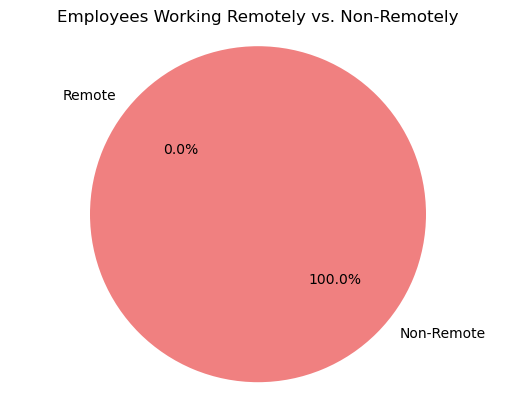

In [76]:
remote_work= len(df[df['location'] == 'remote'])
non_remote_work = len(df[df['location'] != 'remote'])

# Create data for the pie chart
labels = ['Remote', 'Non-Remote']
sizes = [remote_work, non_remote_work]
colors = ['skyblue', 'lightcoral']


plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)


plt.title("Employees Working Remotely vs. Non-Remotely")

plt.axis('equal')  
plt.show()

# What percentage of employees have worked for 10 years or more?

In [70]:
df['hire_date'] = pd.to_datetime(df['hire_date'])

# Calculate the years of employment
current_date = pd.to_datetime('now')
df['years_of_employment'] = (current_date - df['hire_date']).dt.days // 365


percentage_10 = (df['years_of_employment'] >= 10).mean() * 100

print(f"Percentage of employees with 10 years or more of employment: {percentage_10:.2f}%")

Percentage of employees with 10 years or more of employment: 38.54%


# In which area do most of the employees live?

In [72]:
df['location_area'] = df['location_city'] + ', ' + df['location_state']

# Find the most common location area where employees live
most_common = df['location_area'].mode()[0]

num_employees = (df['location_area'] == most_common).sum()

print(f"Most common location where employees live: {most_common}")
print(f"Number of employees living in the most common location: {num_employees}")

Most common location where employees live: Cleveland, Ohio
Number of employees living in the most common location: 16871


# Which department has the most Gen Z employees?

In [73]:
genz_department = df[df['GenZ']].groupby('department')['id'].count().reset_index()
genz_department.rename(columns={'id': 'GenZ_Count'}, inplace=True)

# Find the department with the most Gen Z employees
most_common = genz_department[genz_department['GenZ_Count'] == genz_department['GenZ_Count'].max()]

print("Department(s) with the most Gen Z employees:")
print(most_common_department)

Department(s) with the most Gen Z employees:
    department  GenZ_Count
3  Engineering         678


# Which race has the highest number of Gen Z employees?

In [74]:
genz_df = df[df['GenZ']]

genz_race = genz_df.groupby('race')['id'].count().reset_index()
genz_race.rename(columns={'id': 'GenZ_Count'}, inplace=True)

# Find the race with the highest number of Gen Z employees
most_common = genz_race[genz_race['GenZ_Count'] == genz_race['GenZ_Count'].max()]

print("Race(s) with the highest number of Gen Z employees:")
print(most_common)

Race(s) with the highest number of Gen Z employees:
    race  GenZ_Count
6  White         635
